In [0]:
import requests
import pandas as pd

# Define parameters to be passed foe the api call
start_date = "2016010100"
end_date = "2022123100"
granularity = "monthly"

projects = ["en.wikipedia.org", "www.mediawiki.org", "commons.wikimedia.org"]  
access_methods = ["desktop", "mobile-app", "mobile-web"] 
agents = ["user", "spider", "automated"] 
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

# Initializing an empty list to store response object data
data_list = []

# Loop through the combinations of parameters
for project in projects:
    for access_method in access_methods:
        for agent in agents:
            url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access_method}/{agent}/{granularity}/{start_date}/{end_date}"
            print(url)
            response = requests.get(url,headers=headers)
            
            if response.status_code == 200:
                data = response.json()
                data_list.append(data["items"])
            else:
                print(f"Request for {project}, {access_method}, {agent} failed. Status code:", response.status_code)

# Create a DataFrame from the collected data in data list
df1 = pd.DataFrame([item for sublist in data_list for item in sublist])

# Display the final DataFrame
print(df1)


https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/user/monthly/2016010100/2022123100
https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/spider/monthly/2016010100/2022123100
https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/automated/monthly/2016010100/2022123100
https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-app/user/monthly/2016010100/2022123100
https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-app/spider/monthly/2016010100/2022123100
https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-app/automated/monthly/2016010100/2022123100
https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-web/user/monthly/2016010100/2022123100
https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-web/spider/monthly/2016010100/2022

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2016-01-01 to 2022-12-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   project      1552 non-null   object
 1   access       1552 non-null   object
 2   agent        1552 non-null   object
 3   granularity  1552 non-null   object
 4   views        1552 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 105.0+ KB


In [0]:
print(df1.isnull().sum())

project        0
access         0
agent          0
granularity    0
timestamp      0
views          0
dtype: int64


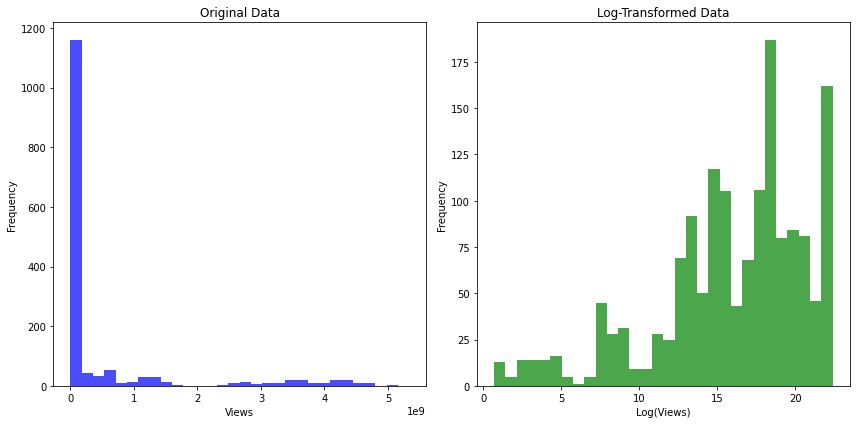

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame with the 'views' column
# Apply a logarithmic transformation to the 'views' column
df1['views_log'] = np.log1p(df1['views'])  # Using np.log1p to avoid issues with zero values

# Plot the original and transformed data to visualize the change
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df1['views'], bins=30, color='blue', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Views')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df1['views_log'], bins=30, color='green', alpha=0.7)
plt.title('Log-Transformed Data')
plt.xlabel('Log(Views)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Summary Statistics:
              views    views_log
count  1.552000e+03  1552.000000
mean   5.408539e+08    15.924377
std    1.174658e+09     4.834857
min    1.000000e+00     0.693147
25%    7.836962e+05    13.571776
50%    3.034097e+07    17.228004
75%    1.810368e+08    19.014204
max    5.332822e+09    22.397146

Count of Unique Values:
project           3
access            3
agent             3
granularity       1
timestamp        84
views          1523
views_log      1523
dtype: int64

Missing Value Counts:
project        0
access         0
agent          0
granularity    0
timestamp      0
views          0
views_log      0
dtype: int64

Correlation Matrix:
              views  views_log
views      1.000000   0.539519
views_log  0.539519   1.000000


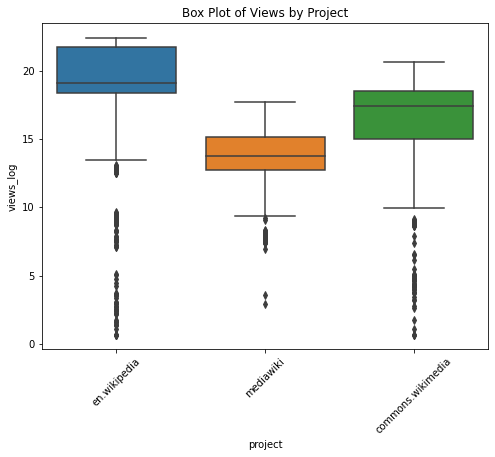

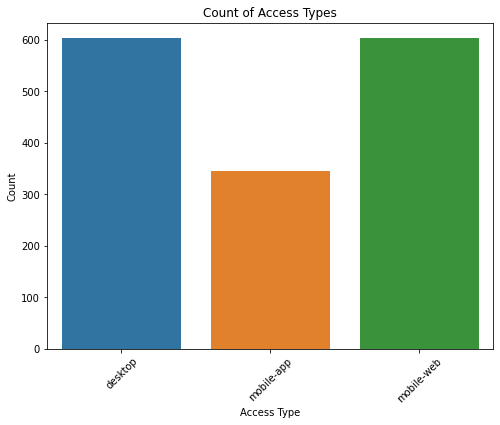

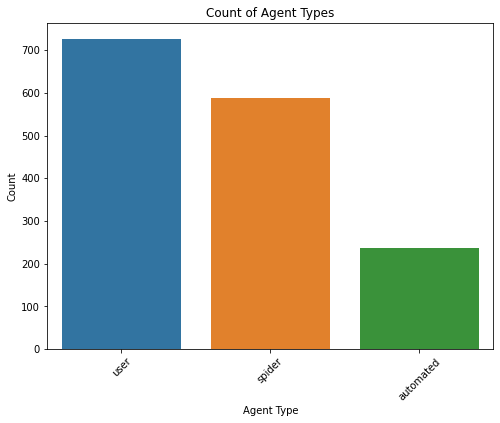

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's already loaded)

# Summary statistics
summary_stats = df1.describe()
print("Summary Statistics:")
print(summary_stats)

# Count of unique values in each column
unique_counts = df1.nunique()
print("\nCount of Unique Values:")
print(unique_counts)

# Missing value count in each column
missing_counts = df1.isnull().sum()
print("\nMissing Value Counts:")
print(missing_counts)

# Correlation matrix (for numeric columns)
correlation_matrix = df1.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Box plot to visualize distribution of 'views'
plt.figure(figsize=(8, 6))
sns.boxplot(x='project', y='views_log', data=df1)
plt.title('Box Plot of Views by Project')
plt.xticks(rotation=45)
plt.show()

# Countplot of 'access' types
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='access')
plt.title('Count of Access Types')
plt.xlabel('Access Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Countplot of 'agent' types
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='agent')
plt.title('Count of Agent Types')
plt.xlabel('Agent Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


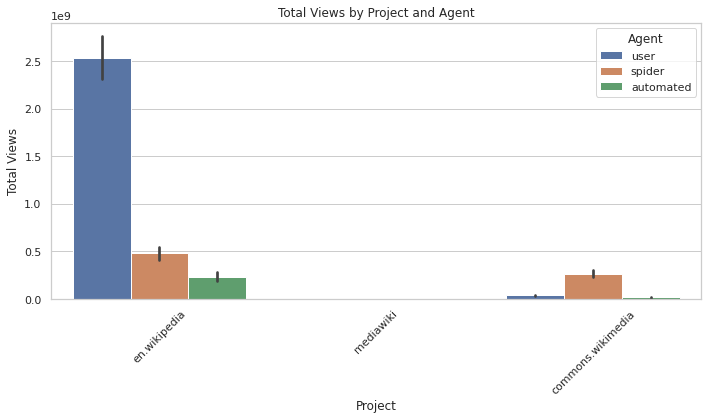

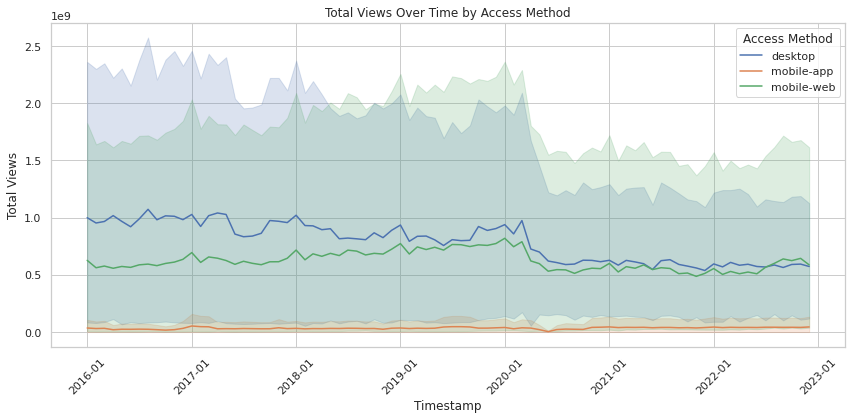

In [0]:
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

access_methods = ["desktop", "mobile-app", "mobile-web"]

sns.set(style="whitegrid")

# Create a bar plot for total views by project
plt.figure(figsize=(10, 6))
sns.barplot(x="project", y="views", hue="agent", data=df1)
plt.title("Total Views by Project and Agent")
plt.xlabel("Project")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Agent")
plt.show()

# Create a line plot for total views over time
# Convert 'access_method' to categorical data type
df1['access'] = pd.Categorical(df1['access'], categories=access_methods, ordered=True)
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%Y%m%d%H')
plt.figure(figsize=(12, 6))
sns.lineplot(x="timestamp", y="views", hue="access", data=df1)

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

plt.title("Total Views Over Time by Access Method")
plt.xlabel("Timestamp")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Access Method")
plt.show()

In [0]:
import requests
import pandas as pd

# Define the respective API endpoints
registered_users_url = "https://wikimedia.org/api/rest_v1/metrics/registered-users/new/en.wikipedia/daily/20160101/20221231"
edited_pages_url = "https://wikimedia.org/api/rest_v1/metrics/edited-pages/aggregate/en.wikipedia/all-editor-types/all-page-types/all-activity-levels/daily/20160101/20221231"

# Perform the getcall to the API's and store the response data
registered_users_response = requests.get(registered_users_url)
edited_pages_response = requests.get(edited_pages_url)

# Convert the response objects to JSON
registered_users_data = registered_users_response.json()
edited_pages_data = edited_pages_response.json()

# Create DataFrames from the JSON response data
registered_users_df = pd.DataFrame(registered_users_data["items"][0]["results"])
edited_pages_df = pd.DataFrame(edited_pages_data["items"][0]["results"])

# Convert timestamps to the appropriate datetime format
registered_users_df["timestamp"] = pd.to_datetime(registered_users_df["timestamp"])
edited_pages_df["timestamp"] = pd.to_datetime(edited_pages_df["timestamp"])

# Rename the columns(this is optional,only if you wanna do it)
registered_users_df.rename(columns={"new_registered_users": "new_users"}, inplace=True)
edited_pages_df.rename(columns={"edited_pages": "daily_edits"}, inplace=True)

# Merge DataFrames on 'timestamp' column
merged_df = pd.merge(registered_users_df, edited_pages_df, on="timestamp", how="inner")

# Calculate ratio of new users to edits
merged_df["new_users_to_edits_ratio"] = merged_df["new_users"] / merged_df["daily_edits"]

# Display the final merged DataFrame
print(merged_df)


                     timestamp  new_users  daily_edits  \
0    2016-01-01 00:00:00+00:00       4367        64087   
1    2016-01-02 00:00:00+00:00       5289        71560   
2    2016-01-03 00:00:00+00:00       5359        67112   
3    2016-01-04 00:00:00+00:00       5904        77309   
4    2016-01-05 00:00:00+00:00       5935        71602   
...                        ...        ...          ...   
2551 2022-12-26 00:00:00+00:00       2651       144356   
2552 2022-12-27 00:00:00+00:00       2969       139553   
2553 2022-12-28 00:00:00+00:00       3059       138819   
2554 2022-12-29 00:00:00+00:00       3044       144633   
2555 2022-12-30 00:00:00+00:00       3093       127609   

      new_users_to_edits_ratio  
0                     0.068142  
1                     0.073910  
2                     0.079852  
3                     0.076369  
4                     0.082889  
...                        ...  
2551                  0.018364  
2552                  0.021275  
2553  

In [0]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 0 to 2555
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   timestamp                 2556 non-null   datetime64[ns, UTC]
 1   new_users                 2556 non-null   int64              
 2   daily_edits               2556 non-null   int64              
 3   new_users_to_edits_ratio  2556 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2)
memory usage: 99.8 KB


Summary Statistics:
         new_users    daily_edits  new_users_to_edits_ratio
count  2556.000000    2556.000000               2556.000000
mean   4430.023083   88690.776213                  0.051892
std     887.050476   16026.114732                  0.014446
min    2222.000000   53033.000000                  0.014171
25%    3764.750000   77548.500000                  0.040233
50%    4476.500000   84722.000000                  0.053599
75%    5085.000000   95956.250000                  0.062831
max    7969.000000  206835.000000                  0.089033

Count of Unique Values:
timestamp                   2556
new_users                   1779
daily_edits                 2487
new_users_to_edits_ratio    2555
dtype: int64

Missing Value Counts:
timestamp                   0
new_users                   0
daily_edits                 0
new_users_to_edits_ratio    0
dtype: int64


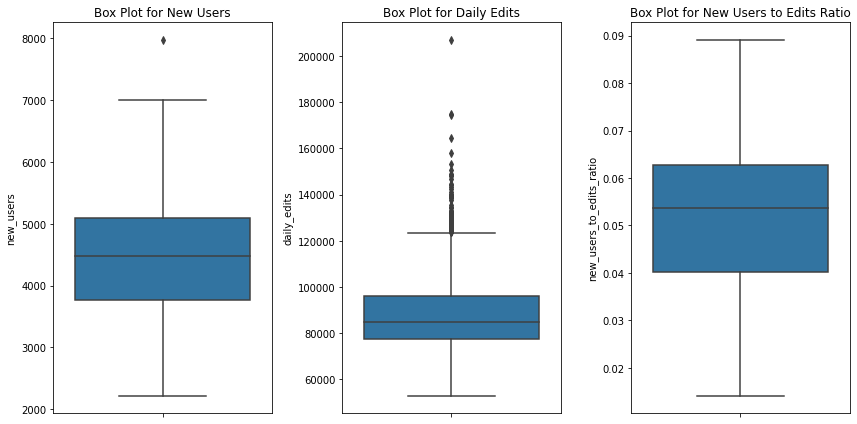

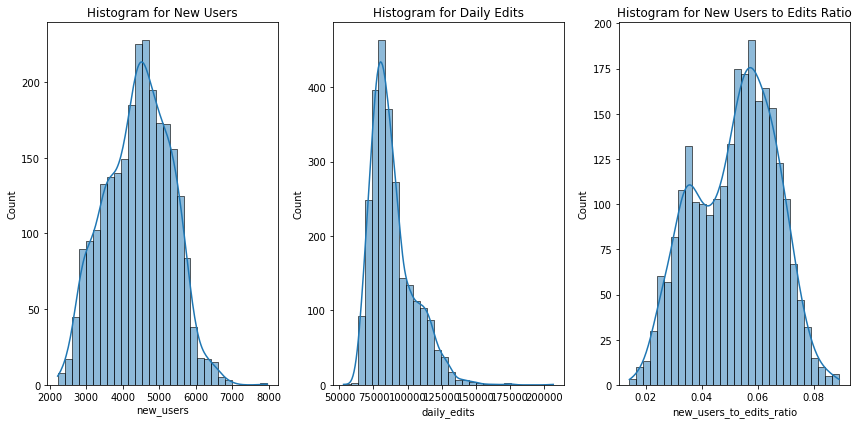

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
summary_stats = merged_df.describe()

# Count of Unique values in the dataset
unique_counts = merged_df.nunique()

# Missing Value counts in the dataset
missing_counts = merged_df.isnull().sum()

# Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=merged_df, y='new_users')
plt.title('Box Plot for New Users')

plt.subplot(1, 3, 2)
sns.boxplot(data=merged_df, y='daily_edits')
plt.title('Box Plot for Daily Edits')

plt.subplot(1, 3, 3)
sns.boxplot(data=merged_df, y='new_users_to_edits_ratio')
plt.title('Box Plot for New Users to Edits Ratio')

plt.tight_layout()

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=merged_df, x='new_users', bins=30, kde=True)
plt.title('Histogram for New Users')

plt.subplot(1, 3, 2)
sns.histplot(data=merged_df, x='daily_edits', bins=30, kde=True)
plt.title('Histogram for Daily Edits')

plt.subplot(1, 3, 3)
sns.histplot(data=merged_df, x='new_users_to_edits_ratio', bins=30, kde=True)
plt.title('Histogram for New Users to Edits Ratio')

plt.tight_layout()

# Display Results
print("Summary Statistics:")
print(summary_stats)
print("\nCount of Unique Values:")
print(unique_counts)
print("\nMissing Value Counts:")
print(missing_counts)


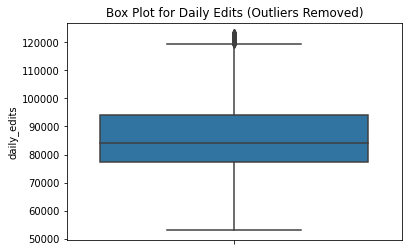

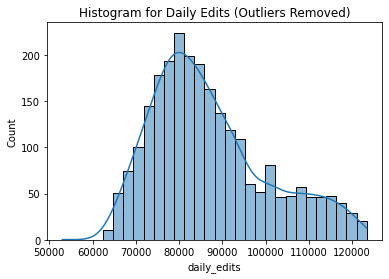

Summary Statistics After Removing Outliers:
         new_users    daily_edits  new_users_to_edits_ratio
count  2466.000000    2466.000000               2466.000000
mean   4449.615572   87038.093268                  0.052711
std     871.892636   13509.726399                  0.013937
min    2223.000000   53033.000000                  0.019686
25%    3811.750000   77172.750000                  0.041638
50%    4496.000000   84106.000000                  0.054293
75%    5087.750000   94082.000000                  0.063094
max    6994.000000  123418.000000                  0.089033

Correlation Matrix after removing outliers:
                          new_users  daily_edits  new_users_to_edits_ratio
new_users                  1.000000    -0.322989                  0.864196
daily_edits               -0.322989     1.000000                 -0.734649
new_users_to_edits_ratio   0.864196    -0.734649                  1.000000


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR(Inter Quartile Range) for 'daily_edits'
Q1 = merged_df['daily_edits'].quantile(0.25)
Q3 = merged_df['daily_edits'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_df[(merged_df['daily_edits'] < lower_bound) | (merged_df['daily_edits'] > upper_bound)]

# Remove outliers from the merged_df dataFrame
cleaned_df = merged_df[(merged_df['daily_edits'] >= lower_bound) & (merged_df['daily_edits'] <= upper_bound)]

# Correlation Matrix
correlation_matrix = cleaned_df.corr()

# Box Plot after removing outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=cleaned_df, y='daily_edits')
plt.title('Box Plot for Daily Edits (Outliers Removed)')
plt.show()

# Histogram after removing outliers
plt.figure(figsize=(6, 4))
sns.histplot(data=cleaned_df, x='daily_edits', bins=30, kde=True)
plt.title('Histogram for Daily Edits (Outliers Removed)')
plt.show()

# Summary Statistics after removing outliers on the cleaned_df dataframe
summary_stats_cleaned = cleaned_df.describe()

# Displaying the results
print("Summary Statistics After Removing Outliers:")
print(summary_stats_cleaned)
print("\nCorrelation Matrix after removing outliers:")
print(correlation_matrix)


In [0]:
print(cleaned_df.isnull().sum())

timestamp                   0
new_users                   0
daily_edits                 0
new_users_to_edits_ratio    0
dtype: int64


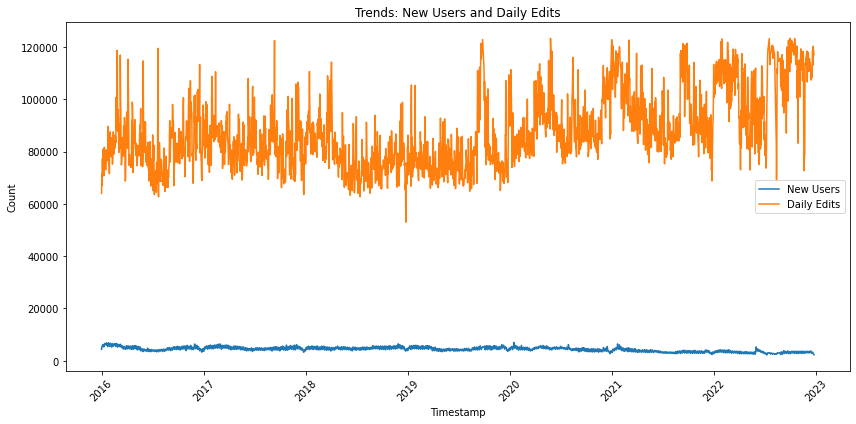

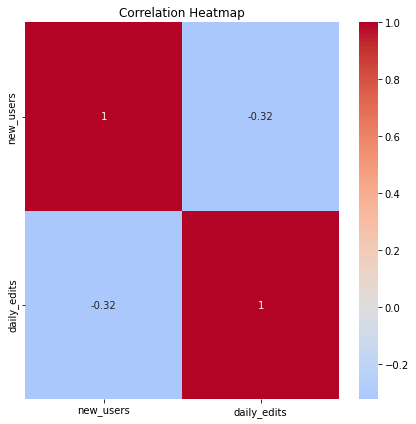

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x="timestamp", y="new_users", data=cleaned_df, label="New Users")
sns.lineplot(x="timestamp", y="daily_edits", data=cleaned_df, label="Daily Edits")
plt.title("Trends: New Users and Daily Edits")
plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Calculate and plot the correlations
correlation_matrix = cleaned_df[["new_users", "daily_edits"]].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()